In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_context(context='notebook')

In [2]:
matches_df = pd.read_csv('../data/raw/matches.csv')
matches_df.head()

,token,winning_team,mirror,ladder,patch,average_rating,map,map_size,num_players,server,duration
0,B2c2Ad6Uf6TVL5uk,2,False,RM_1v1,39515,1575.0,arabia,tiny,2,brazilsouth,0:23:30
1,eb8WdcbYlpeFLnoc,2,False,RM_TEAM,39515,2187.0,arabia,large,8,eastus,0:32:48
2,tphUBvZ8eZBmai0L,2,False,RM_TEAM,39515,2450.0,megarandom,large,8,brazilsouth,0:33:08
3,Kmhn0HZ8o8WwdXV9,1,False,RM_TEAM,39515,2387.0,arabia,large,8,ukwest,0:25:51
4,U198Wdc3kzJPBVqh,1,False,RM_1v1,37906,1095.0,acropolis,tiny,2,eastus,0:40:55


In [3]:
players_df = pd.read_csv('../data/raw/match_players.csv')
players_df.head()

,token,match,rating,color,civ,team,winner
0,rFWxLAdY6TF78xlo,axps4XstiBOmrDeG,1565.0,Red,Chinese,1,False
1,zsyvxRyzLh85YIba,axps4XstiBOmrDeG,1600.0,Blue,Goths,2,True
2,CHrJISNtjKDKM114,uQdosqwC7uiQ78ya,2145.0,Orange,Incas,1,False
3,X147inwVdQuaegxT,uQdosqwC7uiQ78ya,2124.0,Green,Tatars,2,True
4,kNckdaCe6pjKm6Au,uQdosqwC7uiQ78ya,2105.0,Red,Magyars,1,False


## **Let's start with exploring the Matches Dataset**
***

In [4]:
matches_df.shape

(3153767, 11)

In [5]:
matches_df.dtypes

token              object
winning_team        int64
mirror               bool
ladder             object
patch               int64
average_rating    float64
map                object
map_size           object
num_players         int64
server             object
duration           object
dtype: object

In [6]:
matches_df.describe(include='all')

,token,winning_team,mirror,ladder,patch,average_rating,map,map_size,num_players,server,duration
count,3153767,3.153767e+06,3153767,3153767,3.153767e+06,2.990459e+06,3153767,3153767,3.153767e+06,3153767,3153767
unique,3153767,NaN,2,2,NaN,NaN,47,4,NaN,9,62123
top,B2c2Ad6Uf6TVL5uk,NaN,False,RM_1v1,NaN,NaN,arabia,tiny,NaN,ukwest,0:31:29
freq,1,NaN,3005287,2152662,NaN,NaN,1174357,2153142,NaN,1462621,5189
mean,NaN,1.506349e+00,NaN,NaN,3.914588e+04,1.271157e+03,NaN,NaN,3.085992e+00,NaN,NaN
std,NaN,4.999731e-01,NaN,NaN,2.345165e+03,3.669538e+02,NaN,NaN,1.827453e+00,NaN,NaN
min,NaN,-1.000000e+00,NaN,NaN,3.558400e+04,1.010000e+02,NaN,NaN,2.000000e+00,NaN,NaN
25%,NaN,1.000000e+00,NaN,NaN,3.690600e+04,1.012000e+03,NaN,NaN,2.000000e+00,NaN,NaN
50%,NaN,2.000000e+00,NaN,NaN,3.951500e+04,1.198000e+03,NaN,NaN,2.000000e+00,NaN,NaN
75%,NaN,2.000000e+00,NaN,NaN,4.087400e+04,1.451000e+03,NaN,NaN,4.000000e+00,NaN,NaN


In [7]:
# Is there any null data?
(
matches_df
.isnull()
.sum()
 )


token                  0
winning_team           0
mirror                 0
ladder                 0
patch                  0
average_rating    163308
map                    0
map_size               0
num_players            0
server                 0
duration               0
dtype: int64

In [8]:
null_percentage = np.round((matches_df.isnull().sum().sum()*100)/(matches_df.shape[0]), 2)
print('The Percentage of null data is: {}%'.format(null_percentage))

The Percentage of null data is: 5.18%


We have **5,18%** of our data as **null**, all of it belonging to the _average_rating_ column, this is probably because, as the game's leaderboard interface states, the ELO (which is used to calculate the _average_rating_ column of the dataset) of a player is calculated after he has participated in at least in 10 games.  We will delete that 5%

We have to take into consideration that the ELO of players is discriminated betweeen 1vs1 and Team Match, so they can't be analyzed as beign equal.

*You can learn more about the ELO rating system **[here](https://en.wikipedia.org/wiki/Elo_rating_system)**

In [9]:
#droping the null values
matches_df = matches_df.dropna()
matches_df.shape

(2990459, 11)

In [10]:
# Whats the proportion of Games 
(
    matches_df
    .ladder
    .value_counts()
    )

ladder
RM_1v1     2078744
RM_TEAM     911715
Name: count, dtype: int64

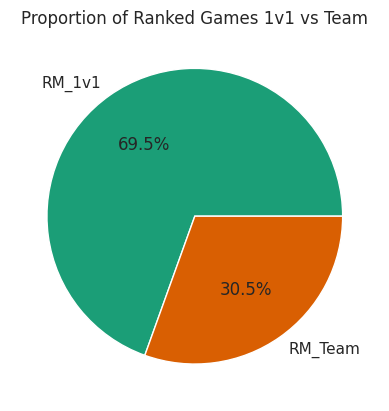

In [11]:
#Let's see the proportion of games in a graphic way

data = matches_df.ladder.value_counts()
data2 = [2078744, 911715]
labels =['RM_1v1', 'RM_Team']

palette_color = sns.color_palette('Dark2') 
plt.pie(data, labels=labels, colors=palette_color, autopct= '%1.1f%%')
plt.title('Proportion of Ranked Games 1v1 vs Team');




In [12]:
# Let's see the average ELO by Ladder
means_rm = matches_df.groupby(['ladder']).average_rating.mean()
means_rm



ladder
RM_1v1     1147.667255
RM_TEAM    1552.717196
Name: average_rating, dtype: float64

''

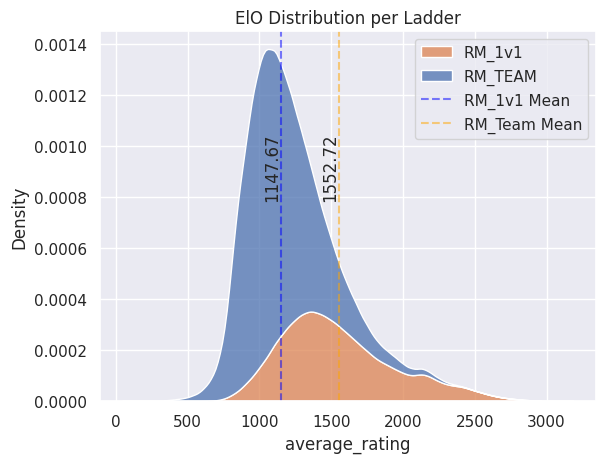

In [13]:
#let's see how it's the ELO distribution among players and Ladder
ax = sns.kdeplot(
     data = matches_df, 
     x='average_rating', 
     hue='ladder', 
     multiple="stack"
     )
plt.axvline(
    x=means_rm.iloc[0],
    linestyle='dashed',
    color= 'blue',
    alpha = 0.5
)
plt.axvline(
    x=means_rm.iloc[1],
    linestyle='dashed',
    color= 'orange',
    alpha = 0.5
)
ax.set_title('ElO Distribution per Ladder')
for i in range(len(means_rm)):
    ax.annotate(str(np.round(means_rm.iloc[i],2)),[means_rm.iloc[i],0.0008], rotation=90, ha='right')
ax.legend(labels=['RM_1v1','RM_TEAM', 'RM_1v1 Mean', 'RM_Team Mean']);

As we can see in the upper plot, the average ELO of the RM ladder is almost 400 points above the ELO of the 1v1 ladder, this could signify two things

- It's very plausible that the Higher Team Match ELO it's due to the collective effort of the team, making possible to compensate the individual mistakes a player can make, contrary to a 1v1 match when there is less room for mistakes. In the same line of thought we have to take into account that the specific weaknesss of a civilization can be also compensated by an ally's civilization pick, and even there are some civilization combos with very good sinergies that boost their natural advantages.


- In the 1v1 Ladder the possibility of victory is much more realiable on a good pick of civilization, map and strategy. Meaning that the player must have the knowledge to apply the correct combo of them, the correct openning and the skill required to execute it. That means that 

-

In [21]:
server_counts = dict(matches_df.server.value_counts())
server_counts


{'ukwest': 1386196,
 'eastus': 561528,
 'brazilsouth': 449770,
 'westindia': 157264,
 'southeastasia': 140361,
 'westus2': 115072,
 'australiasoutheast': 79685,
 'westeurope': 65546,
 'koreacentral': 35037}

''

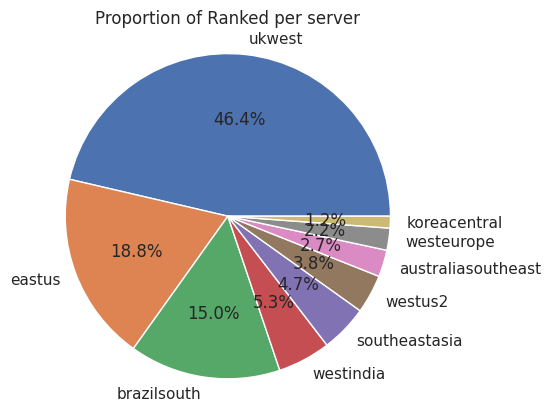

In [22]:
plt.pie(server_counts.values(), labels=server_counts.keys(), autopct= '%1.1f%%', radius = 1.1)
plt.title('Proportion of Ranked per server', loc = 'center');
;

As we can see the game is very popular in Europe (arround 48.8% of the games were played in the ukwest and westeurope servers) and in the American continent (37.6% of the games were played in the eastus brazilsout and westus2 servers)

In [27]:
# Let's see the most popular maps per ladder
maps_1v1 = matches_df[matches_df['ladder']=='RM_1v1']
maps_team = matches_df[matches_df['ladder']=='RM_TEAM']

ladder   map            
RM_1v1   arabia             893914
         arena              248480
         four_lakes         138015
         golden_pit         107552
         hideout            100854
                             ...  
RM_TEAM  migration            1694
         islands              1646
         ravines              1509
         pacific_islands      1209
         coastal               154
Name: count, Length: 77, dtype: int64

In [63]:
# 1v1 Maps
(maps_1v1['map'].value_counts()[:5])*100/data2[0]

map
arabia        43.002602
arena         11.953372
four_lakes     6.639346
golden_pit     5.173893
hideout        4.851680
Name: count, dtype: float64

In [64]:
# Team_RM maps
(maps_team['map'].value_counts()[:5]*100/data2[1])



map
arabia          25.725473
arena           16.540915
lombardia        7.121743
black_forest     5.904257
megarandom       5.477260
Name: count, dtype: float64

* In the 1v1 Ladder, the absolute winner in the map pool is Arabia (with 43% of the games played), this is due to [Arabia](https://liquipedia.net/ageofempires/Arabia) being the standart for 1v1 since the inception of the competitive scene in **[Voobly](https://www.voobly.com/games/view/Age-of-Empires-II-The-Conquerors)** in the early 2000's, and the the reason for that it's quite simple, Arabia was the first map in alphabetic order to show up in the map pool. 
The second one is [Arena](https://liquipedia.net/ageofempires/Arena) (with 12% of the games played), which it's a defensive one since the players start with walls arround their base making the game a little bit easier for most players since there is no chance for early agressions.
The next 3 popular maps are [Four Lakes](https://liquipedia.net/ageofempires/Four_Lakes) (6,6%), [Golden Pit](https://liquipedia.net/ageofempires/Golden_Pit) (5,1%), and [Hideout](https://liquipedia.net/ageofempires/Hideout) (4,8%)
* On the Team Ladder, we have the same situation with the number one being Arabia (25,7%) and number two Arena (16,5%), meaning that those maps are meaningfull for the community, the next 3 maps are [Lombardía](https://liquipedia.net/ageofempires/Lombardia) (7.1%), [Black Forest](https://liquipedia.net/ageofempires/Black_Forest) (5,9%) and [Megarandom](https://liquipedia.net/ageofempires/MegaRandom) (5,4%)

In the 1v1 Ladder the 